In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

%matplotlib inline  

In [2]:
mlc_df = pd.read_csv("../data/MLC_data_sample.csv")

In [3]:
mlc_df.head()

,If,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,"10,175",Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,"62,105",Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0


### data cleanup

##### rename columns

In [4]:
mlc_df.columns = ['ISRC', 'Country', 'Registrant', 'Release_Year', 'Period', 'DSP', 'Streams', 'Artist', 'Label', 'Song', 'Album', 'Duration', 'Songwriter?']

In [5]:
mlc_df.head()

,ISRC,Country,Registrant,Release_Year,Period,DSP,Streams,Artist,Label,Song,Album,Duration,Songwriter?
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,"10,175",Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,"62,105",Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0


In [6]:
mlc_df.tail()

,ISRC,Country,Registrant,Release_Year,Period,DSP,Streams,Artist,Label,Song,Album,Duration,Songwriter?
99995,QZK6F2019397,QZ,K6F,20.0,3/1/2021,Spotify,"28,549",Myuk,Sony Music Labels Inc.,魔法 - Anime Size,魔法 (Anime Size),89,1
99996,QZK6F2019397,QZ,K6F,20.0,3/1/2021,Spotify,"28,941",yama,Sony Music Labels Inc.,麻痺,麻痺,199,1
99997,SE6HN1926755,SE,6HN,19.0,3/1/2021,Spotify,"28,941",yama,Sony Music Labels Inc.,麻痺,麻痺,199,1
99998,SEYOK1669274,SE,YOK,16.0,3/1/2021,Apple,"8,970",yama,Sony Music Labels Inc.,麻痺,麻痺 - Single,198,1
99999,QZK6F2019397,QZ,K6F,20.0,2/1/2021,Spotify,"11,245",Lexie Liu,泥鞋（北京）文化传媒有限公司,黑洞 Metropolis,无限意识 Meta Ego,259,1


In [7]:
mlc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ISRC          98240 non-null   object 
 1   Country       98303 non-null   object 
 2   Registrant    98303 non-null   object 
 3   Release_Year  98239 non-null   float64
 4   Period        91898 non-null   object 
 5   DSP           96001 non-null   object 
 6   Streams       100000 non-null  object 
 7   Artist        100000 non-null  object 
 8   Label         98992 non-null   object 
 9   Song          100000 non-null  object 
 10  Album         99931 non-null   object 
 11  Duration      100000 non-null  int64  
 12  Songwriter?   100000 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 9.9+ MB


##### column index number 6, Streams, is stored as a string and needs to be numeric -- remove any spaces (leading, trailing, or otherwise) and comma separators

In [8]:
mlc_df["Streams"] = mlc_df["Streams"].str.replace(",", "")
mlc_df["Streams"] = mlc_df["Streams"].str.replace(" ", "")
mlc_df[["Streams"]] = mlc_df[["Streams"]].apply(pd.to_numeric)
mlc_df.head()

,ISRC,Country,Registrant,Release_Year,Period,DSP,Streams,Artist,Label,Song,Album,Duration,Songwriter?
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,10175,Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,8597,LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,261280,LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,62105,Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0


In [9]:
mlc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ISRC          98240 non-null   object 
 1   Country       98303 non-null   object 
 2   Registrant    98303 non-null   object 
 3   Release_Year  98239 non-null   float64
 4   Period        91898 non-null   object 
 5   DSP           96001 non-null   object 
 6   Streams       100000 non-null  int64  
 7   Artist        100000 non-null  object 
 8   Label         98992 non-null   object 
 9   Song          100000 non-null  object 
 10  Album         99931 non-null   object 
 11  Duration      100000 non-null  int64  
 12  Songwriter?   100000 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 9.9+ MB


looks better -- all columns have a data type I'm satisfied with now

### EDA in separate workbook, as well as in workbooks on team members' branches and discussed in class. On to analysis

we want to create three dataframes and then merge them into one:
- the percentage of time that each DSP has provided songwriter information in this data sample
- the total number of streams each DSP has across the dataset
- the count of data records for each DSP
this will allow us to look at DSPs who are providing incomplete data submissions, but with the lens of who the heaviest hitters are (in terms of work required by MLC to pay the most songwriters)

### songwriter dataframe

In [10]:
sw_ratio = mlc_df.groupby('DSP')['Songwriter?'].mean()
sw_ratio = sw_ratio.sort_values(ascending=False)
print(sw_ratio)

DSP
Classical Archives    1.000000
Qoboz                 0.903846
Deezer                0.862745
Spotify               0.854376
Apple                 0.808514
Recisio               0.545455
Amazon                0.261740
Pandora               0.244828
Melodyv               0.114596
LiveXLive             0.070000
GTL                   0.028440
Tidal                 0.003692
Smithsonian           0.000000
Ultimate Guitar       0.000000
Trebel                0.000000
Wolfgangs             0.000000
SoundCloud            0.000000
Sonos                 0.000000
YouTube               0.000000
Pacemaker             0.000000
PowerMusic            0.000000
Anghami               0.000000
NugsNet               0.000000
MonkingMe             0.000000
MixCloud              0.000000
Midwest Tape          0.000000
Fan Label             0.000000
AudioMack             0.000000
iHeart Radio          0.000000
Name: Songwriter?, dtype: float64


In [11]:
songwriter_df = pd.DataFrame(sw_ratio)
songwriter_df.reset_index(inplace=True)
songwriter_df.columns = ['DSP', 'SW_Avg']
print(songwriter_df)

                   DSP    SW_Avg
0   Classical Archives  1.000000
1                Qoboz  0.903846
2               Deezer  0.862745
3              Spotify  0.854376
4                Apple  0.808514
5              Recisio  0.545455
6               Amazon  0.261740
7              Pandora  0.244828
8              Melodyv  0.114596
9            LiveXLive  0.070000
10                 GTL  0.028440
11               Tidal  0.003692
12         Smithsonian  0.000000
13     Ultimate Guitar  0.000000
14              Trebel  0.000000
15           Wolfgangs  0.000000
16          SoundCloud  0.000000
17               Sonos  0.000000
18             YouTube  0.000000
19           Pacemaker  0.000000
20          PowerMusic  0.000000
21             Anghami  0.000000
22             NugsNet  0.000000
23           MonkingMe  0.000000
24            MixCloud  0.000000
25        Midwest Tape  0.000000
26           Fan Label  0.000000
27           AudioMack  0.000000
28        iHeart Radio  0.000000


In [12]:
streams_per_DSP = mlc_df.groupby('DSP')['Streams'].sum()
streams_per_DSP = streams_per_DSP.sort_values(ascending=False)
print(streams_per_DSP)

DSP
Spotify               2552563722
Apple                 1606453701
Pandora                874236566
SoundCloud             166813813
YouTube                158031119
Amazon                 151199800
Tidal                   48793126
AudioMack               11991559
Melodyv                  5384657
iHeart Radio             2141959
GTL                      1280764
Trebel                    149347
NugsNet                   110709
LiveXLive                 101307
Deezer                     87830
Midwest Tape               85708
Anghami                    34682
Sonos                      31402
Qoboz                       6621
MonkingMe                   3549
PowerMusic                  3154
MixCloud                    2661
Pacemaker                   1707
Wolfgangs                    965
Ultimate Guitar              309
Smithsonian                  208
Fan Label                     91
Recisio                       29
Classical Archives            20
Name: Streams, dtype: int64


In [13]:
streams_df = pd.DataFrame(streams_per_DSP)
streams_df.reset_index(inplace=True)
streams_df.columns = ['DSP', 'Streams_Per_DSP']
print(streams_df)

                   DSP  Streams_Per_DSP
0              Spotify       2552563722
1                Apple       1606453701
2              Pandora        874236566
3           SoundCloud        166813813
4              YouTube        158031119
5               Amazon        151199800
6                Tidal         48793126
7            AudioMack         11991559
8              Melodyv          5384657
9         iHeart Radio          2141959
10                 GTL          1280764
11              Trebel           149347
12             NugsNet           110709
13           LiveXLive           101307
14              Deezer            87830
15        Midwest Tape            85708
16             Anghami            34682
17               Sonos            31402
18               Qoboz             6621
19           MonkingMe             3549
20          PowerMusic             3154
21            MixCloud             2661
22           Pacemaker             1707
23           Wolfgangs              965


In [14]:
rows_per_DSP = mlc_df['DSP'].value_counts()
print(rows_per_DSP)

Spotify               32268
Apple                 22200
Amazon                14438
Pandora               13777
Tidal                  3521
YouTube                2752
SoundCloud             2122
GTL                    1090
Melodyv                 829
Trebel                  817
iHeart Radio            707
AudioMack               550
NugsNet                 316
LiveXLive               200
Qoboz                   104
Midwest Tape            102
Deezer                   51
Anghami                  46
Sonos                    23
Recisio                  22
Smithsonian              21
Ultimate Guitar          19
PowerMusic                8
Wolfgangs                 4
Fan Label                 4
MixCloud                  4
Pacemaker                 3
Classical Archives        2
MonkingMe                 1
Name: DSP, dtype: int64


In [15]:
rows_df = pd.DataFrame(rows_per_DSP)
rows_df.reset_index(inplace=True)
rows_df.columns = ['DSP', 'Songs_Per_DSP']
print(rows_df)

                   DSP  Songs_Per_DSP
0              Spotify          32268
1                Apple          22200
2               Amazon          14438
3              Pandora          13777
4                Tidal           3521
5              YouTube           2752
6           SoundCloud           2122
7                  GTL           1090
8              Melodyv            829
9               Trebel            817
10        iHeart Radio            707
11           AudioMack            550
12             NugsNet            316
13           LiveXLive            200
14               Qoboz            104
15        Midwest Tape            102
16              Deezer             51
17             Anghami             46
18               Sonos             23
19             Recisio             22
20         Smithsonian             21
21     Ultimate Guitar             19
22          PowerMusic              8
23           Wolfgangs              4
24           Fan Label              4
25          

In [16]:
DSP_df1 = pd.merge(songwriter_df, streams_df, on=['DSP'], how='inner')
print(DSP_df1)

                   DSP    SW_Avg  Streams_Per_DSP
0   Classical Archives  1.000000               20
1                Qoboz  0.903846             6621
2               Deezer  0.862745            87830
3              Spotify  0.854376       2552563722
4                Apple  0.808514       1606453701
5              Recisio  0.545455               29
6               Amazon  0.261740        151199800
7              Pandora  0.244828        874236566
8              Melodyv  0.114596          5384657
9            LiveXLive  0.070000           101307
10                 GTL  0.028440          1280764
11               Tidal  0.003692         48793126
12         Smithsonian  0.000000              208
13     Ultimate Guitar  0.000000              309
14              Trebel  0.000000           149347
15           Wolfgangs  0.000000              965
16          SoundCloud  0.000000        166813813
17               Sonos  0.000000            31402
18             YouTube  0.000000        158031119


In [17]:
DSP_df2 = pd.merge(DSP_df1, rows_df, on=['DSP'], how='inner')
print(DSP_df2)

                   DSP    SW_Avg  Streams_Per_DSP  Songs_Per_DSP
0   Classical Archives  1.000000               20              2
1                Qoboz  0.903846             6621            104
2               Deezer  0.862745            87830             51
3              Spotify  0.854376       2552563722          32268
4                Apple  0.808514       1606453701          22200
5              Recisio  0.545455               29             22
6               Amazon  0.261740        151199800          14438
7              Pandora  0.244828        874236566          13777
8              Melodyv  0.114596          5384657            829
9            LiveXLive  0.070000           101307            200
10                 GTL  0.028440          1280764           1090
11               Tidal  0.003692         48793126           3521
12         Smithsonian  0.000000              208             21
13     Ultimate Guitar  0.000000              309             19
14              Trebel  0

In [18]:
DSP_df2 = DSP_df2.sort_values(by=['Streams_Per_DSP'], ascending=False)
print(DSP_df2)

                   DSP    SW_Avg  Streams_Per_DSP  Songs_Per_DSP
3              Spotify  0.854376       2552563722          32268
4                Apple  0.808514       1606453701          22200
7              Pandora  0.244828        874236566          13777
16          SoundCloud  0.000000        166813813           2122
18             YouTube  0.000000        158031119           2752
6               Amazon  0.261740        151199800          14438
11               Tidal  0.003692         48793126           3521
27           AudioMack  0.000000         11991559            550
8              Melodyv  0.114596          5384657            829
28        iHeart Radio  0.000000          2141959            707
10                 GTL  0.028440          1280764           1090
14              Trebel  0.000000           149347            817
22             NugsNet  0.000000           110709            316
9            LiveXLive  0.070000           101307            200
2               Deezer  0

In [19]:
top_5 = DSP_df2.iloc[:5]
print(top_5)

           DSP    SW_Avg  Streams_Per_DSP  Songs_Per_DSP
3      Spotify  0.854376       2552563722          32268
4        Apple  0.808514       1606453701          22200
7      Pandora  0.244828        874236566          13777
16  SoundCloud  0.000000        166813813           2122
18     YouTube  0.000000        158031119           2752


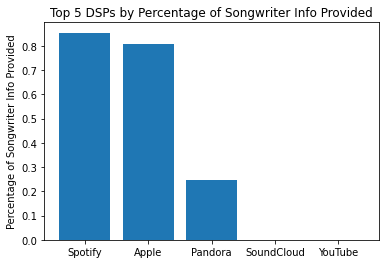

In [20]:
plt.bar(top_5.DSP, top_5.SW_Avg)
plt.ylabel('Percentage of Songwriter Info Provided')
plt.title('Top 5 DSPs by Percentage of Songwriter Info Provided');

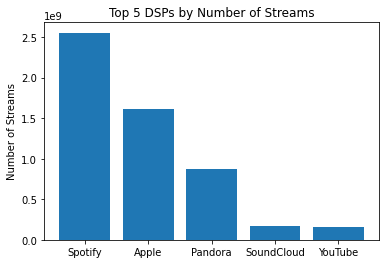

In [21]:
plt.bar(top_5.DSP, top_5.Streams_Per_DSP)
plt.ylabel('Number of Streams')
plt.title('Top 5 DSPs by Number of Streams');

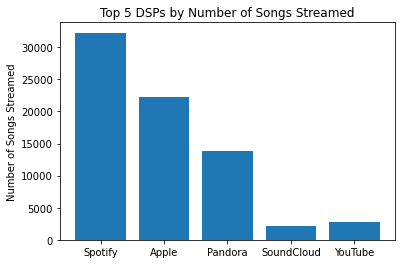

In [22]:
plt.bar(top_5.DSP, top_5.Songs_Per_DSP)
plt.ylabel('Number of Songs Streamed')
plt.title('Top 5 DSPs by Number of Songs Streamed');

### Looking at top 7 DSPs by Stream Count to evaluate MLC's major players more closely -- previously did top 5, but the major cutoff is after the 7th, so we're including the next two. Redo!

In [23]:
top_7 = DSP_df2.head(7)
print(top_7)

           DSP    SW_Avg  Streams_Per_DSP  Songs_Per_DSP
3      Spotify  0.854376       2552563722          32268
4        Apple  0.808514       1606453701          22200
7      Pandora  0.244828        874236566          13777
16  SoundCloud  0.000000        166813813           2122
18     YouTube  0.000000        158031119           2752
6       Amazon  0.261740        151199800          14438
11       Tidal  0.003692         48793126           3521


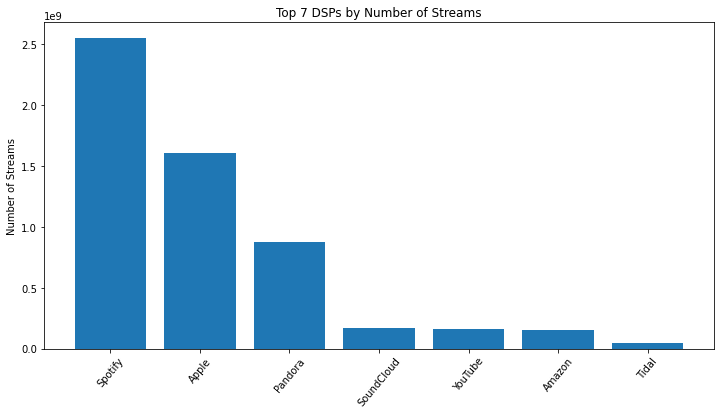

In [24]:
plt.figure(figsize=(12, 6))
plt.bar(top_7.DSP, top_7.Streams_Per_DSP)
plt.ylabel('Number of Streams') # Number of Streams times 10^9
plt.xticks(rotation = 50)
plt.title('Top 7 DSPs by Number of Streams');

##### formatting notes: want to increase font size, ideally would like the 1e9 bit to go away and either have the axis tick labels be their full billion-scale numbers OR have the axis label include "(in billions)" or something. More clear title. I'll come back to this.

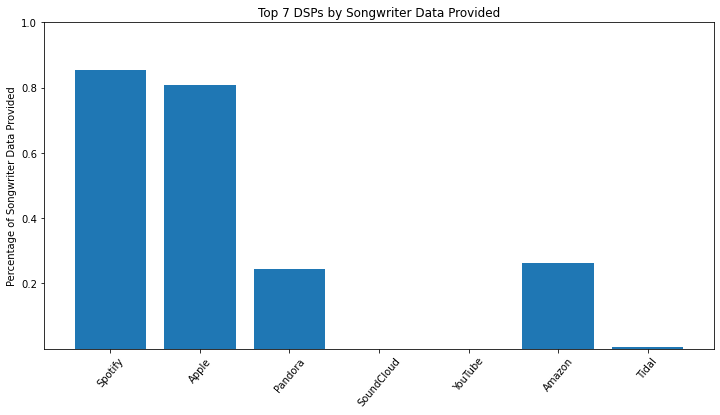

In [31]:
plt.figure(figsize=(12, 6))
plt.bar(top_7.DSP, top_7.SW_Avg)
plt.ylabel('Percentage of Songwriter Data Provided')
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0])
plt.xticks(rotation = 50)
plt.title('Top 7 DSPs by Songwriter Data Provided');

##### formatting notes: it should be in descending order? can color-code DSPs so that if each bar graph is sorted by size, the reordered DSPs are still identifiable between graphs? Need to figure out title of chart and axis to make it more clear, plus font, etc... And can the y axis ticks be 20%, etc, not 0.2?
##### also, should these charts have data labels identifying the actual quantity each bar represents?

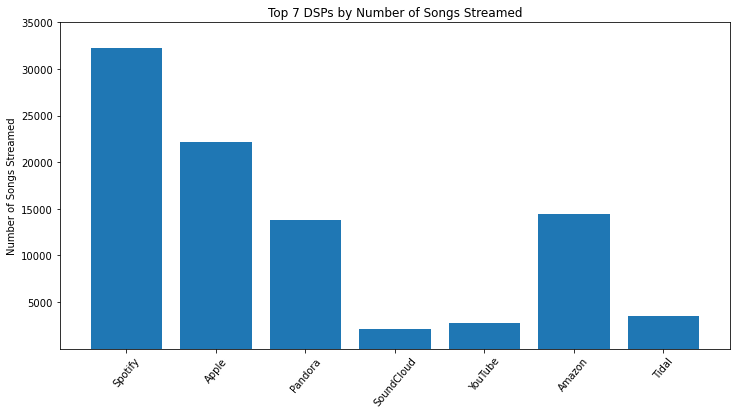

In [34]:
plt.figure(figsize=(12, 6))
plt.bar(top_7.DSP, top_7.Songs_Per_DSP)
plt.ylabel('Number of Songs Streamed')
plt.yticks([5000, 10000, 15000, 20000, 25000, 30000, 35000])
plt.xticks(rotation = 50)
plt.title('Top 7 DSPs by Number of Songs Streamed');